In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from sklearn.metrics import silhouette_score, homogeneity_score, adjusted_rand_score, completeness_score, adjusted_mutual_info_score
from scipy.stats import kurtosis

from sklearn.neural_network import MLPClassifier

In [2]:
file = "dataset_44_spambase.csv"
data = pd.read_csv(file, header=0)

data.columns = ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_%3B","char_freq_%28","char_freq_%5B","char_freq_%21","char_freq_%24","char_freq_%23","capital_run_length_average","capital_run_length_longest","capital_run_length_total","class"]
feature_names = ["word_freq_make","word_freq_address","word_freq_all","word_freq_3d","word_freq_our","word_freq_over","word_freq_remove","word_freq_internet","word_freq_order","word_freq_mail","word_freq_receive","word_freq_will","word_freq_people","word_freq_report","word_freq_addresses","word_freq_free","word_freq_business","word_freq_email","word_freq_you","word_freq_credit","word_freq_your","word_freq_font","word_freq_000","word_freq_money","word_freq_hp","word_freq_hpl","word_freq_george","word_freq_650","word_freq_lab","word_freq_labs","word_freq_telnet","word_freq_857","word_freq_data","word_freq_415","word_freq_85","word_freq_technology","word_freq_1999","word_freq_parts","word_freq_pm","word_freq_direct","word_freq_cs","word_freq_meeting","word_freq_original","word_freq_project","word_freq_re","word_freq_edu","word_freq_table","word_freq_conference","char_freq_%3B","char_freq_%28","char_freq_%5B","char_freq_%21","char_freq_%24","char_freq_%23","capital_run_length_average","capital_run_length_longest","capital_run_length_total"]
label_name = ["class"]

data_features = data
data_features = data_features.drop(labels='class',axis=1)
data_label = data['class']

data_label = data_label.values
data_features = data_features.values

In [3]:
scaler = MinMaxScaler()

data_features_scaled = scaler.fit_transform(data_features)

In [4]:
def plot_graphs(param, curves, curve_labels, param_name="", curve_name=""):
    colors = ['deepskyblue', 'red', 'yellow', 'green', 'midnightblue', 'fuchsia']
    plt.figure()
    lines = []
    for i in range(len(curve_labels)):
        l, = plt.plot(param, curves[i,:], ls='-', marker='+', color=colors[i])
        lines.append(l)
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    
    plt.legend(handles=lines, labels=curve_labels, loc='best')
    plt.show()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(data_features_scaled, data_label, test_size=0.2)

Clustering

In [8]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [6]:
def k_means_clustering(n=2, ini='k-means++', n_ini=10, it=300, t=1e-4, pre='auto', x=True, job=None, algo="auto"):
    
    kmeans = KMeans(n_clusters = n, init = ini, n_init = n_ini, max_iter = it, tol = t, precompute_distances = pre,
                    copy_x = x, n_jobs = job, algorithm = algo, random_state = 5)
    kmeans.fit(data_features_scaled)
    km_pred = kmeans.predict(data_features_scaled)
    
    sli_score = silhouette_score(data_features_scaled, km_pred)
    homo_score = homogeneity_score(data_label, km_pred)
    adj_score = adjusted_rand_score(data_label, km_pred)
    adj_mut_score = adjusted_mutual_info_score(data_label, km_pred)
    comp_score = completeness_score(data_label, km_pred)
    
    r = np.zeros((1,5))
    r[0,0] = sli_score
    r[0,1] = homo_score
    r[0,2] = adj_score
    r[0,3] = adj_mut_score
    r[0,4] = comp_score
    return r

In [9]:
km_cluster_size = [2,3,4,5,6]
l_km_cluster = len(km_cluster_size)
km_cluster_scores = np.zeros((5,l_km_cluster))
for i in range(l_km_cluster):
    km_cluster_scores[:,i] = k_means_clustering(n=km_cluster_size[i])

/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of '

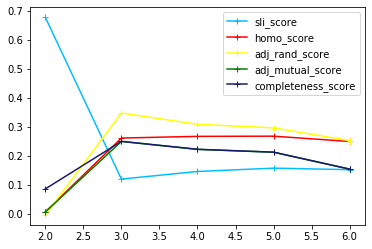

In [10]:
plot_graphs(km_cluster_size, km_cluster_scores, curve_labels=["sli_score", "homo_score", "adj_rand_score", "adj_mutual_score", "completeness_score"])

In [11]:
kmeans = KMeans(n_clusters = 2, init = 'random', n_init = 1000, max_iter = 1000, precompute_distances = True,
                random_state = 5)
kmeans = kmeans.fit_predict(data_features)

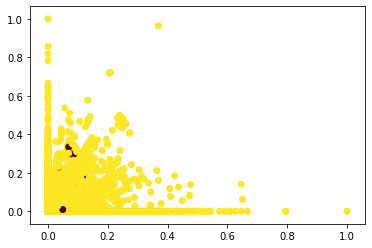

In [12]:
plt.scatter(data_features_scaled[:,11], data_features_scaled[:,20], c=kmeans)
plt.show()

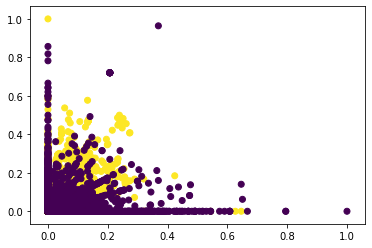

In [13]:
plt.scatter(data_features_scaled[:,11], data_features_scaled[:,20], c=data_label)
plt.show()

In [14]:
def em_clustering(n=1, cov='full', t=0.001, reg=1e-06, it=100, init='kmeans', w=None, means=None, pre=None, warm=False):
    
    em = GaussianMixture(n_components=n, covariance_type=cov, tol=t, reg_covar=reg, max_iter=it,
                        init_params=init, weights_init=w, means_init=means, precisions_init=pre,
                        random_state=None, warm_start=warm)
    
    em_predict = em.fit_predict(data_features_scaled)
    
    sli_score = silhouette_score(data_features_scaled, em_predict)
    homo_score = homogeneity_score(data_label, em_predict)
    adj_score = adjusted_rand_score(data_label, em_predict)
    
    r = np.zeros((1,3))
    r[0,0] = sli_score
    r[0,1] = homo_score
    r[0,2] = adj_score
    return r

In [15]:
em_cluster_size = [2,3,4,5,6,7,8]
l_em_cluster = len(em_cluster_size)
em_cluster_scores = np.zeros((3,l_em_cluster))
for i in range(l_em_cluster):
    em_cluster_scores[:,i] = em_clustering(n=em_cluster_size[i])

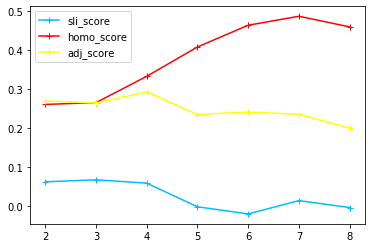

In [16]:
plot_graphs(em_cluster_size, em_cluster_scores, curve_labels=["sli_score", "homo_score", "adj_score"])

In [17]:
cluster_em = GaussianMixture(n_components = 2)
cluster_em = cluster_em.fit_predict(data_features)

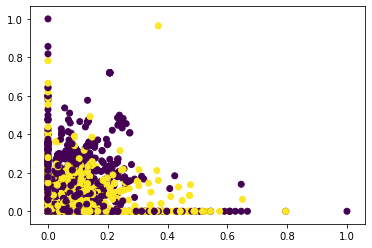

In [18]:
plt.scatter(data_features_scaled[:,11], data_features_scaled[:,20], c=cluster_em)
plt.show()

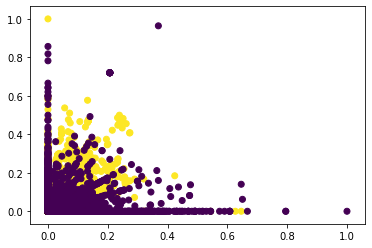

In [19]:
plt.scatter(data_features_scaled[:,11], data_features_scaled[:,20], c=data_label)
plt.show()

## Dimensionality Reduction

In [20]:
from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as SRP
from sklearn.feature_selection import SelectPercentile as SP

In [21]:
def dr_pca(n):
    t = time.time()
    pca = PCA(n_components=n, random_state=3)
    x_pca = pca.fit(data_features)
    dt = time.time() - t
    cum = np.cumsum(pca.explained_variance_ratio_)
    
    fig, x1 = plt.subplots()
    x1.plot(list(range(len(pca.explained_variance_ratio_))), cum, 'b-')
    x1.set_xlabel('Principal components')
    x1.set_ylabel('Cumulative explained variance ratio', color='b')
    x1.tick_params('y', colors='b')
    
    x2 = x1.twinx()
    x2.plot(list(range(len(pca.singular_values_))), pca.singular_values_, 'm-')
    x2.set_ylabel('Eigenvalues', color='m')
    x2.tick_params('y', colors='m')
    
    plt.show()

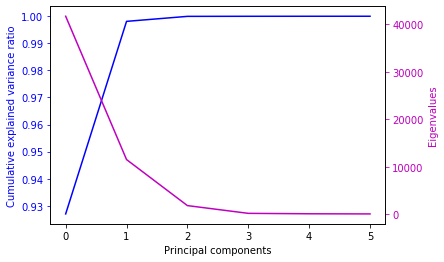

In [22]:
dr_pca(6)

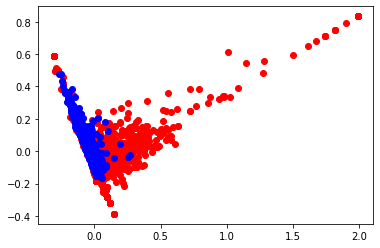

In [23]:
pca = PCA(n_components=2, random_state=3)
x_pca = pca.fit_transform(data_features_scaled)

cls_0 = []
cls_1 = []

for i in range(len(data_label)):
    if(data_label[i] == 0):
        cls_0.append(x_pca[i, :])
    elif(data_label[i] == 1):
        cls_1.append(x_pca[i, :])
plt.plot(np.asarray(cls_0)[:,0], np.asarray(cls_0)[:,1], 'ro')
plt.plot(np.asarray(cls_1)[:,0], np.asarray(cls_1)[:,1], 'bo')

plt.show()

In [24]:
def dr_ica(n=2):
    t = time.time()
    ica = ICA(n_components=n, random_state=3)
    
    x_ica = ica.fit_transform(data_features_scaled)
    
    r = np.mean(kurtosis(x_ica))
    
    return r

In [25]:
list_ica_n = [1,2,3,4,5,6,7,8,9,10,15,20,30,40,50]
len_ica_n = len(list_ica_n)
scores_ica_n = np.zeros((1,len_ica_n))
for i in range(len_ica_n):
    scores_ica_n[0,i] = dr_ica(n=list_ica_n[i])

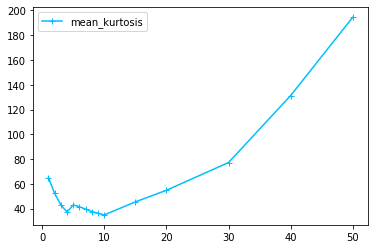

In [26]:
plot_graphs(list_ica_n, scores_ica_n, ['mean_kurtosis'])

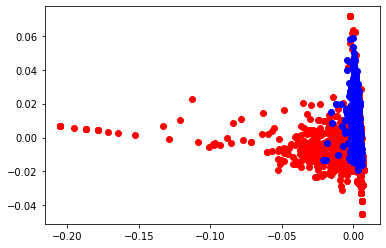

In [27]:
ica = ICA(n_components=2, random_state=3)
x_ica = ica.fit_transform(data_features_scaled)

cls_0 = []
cls_1 = []

for i in range(len(data_label)):
    if(data_label[i] == 0):
        cls_0.append(x_ica[i, :])
    elif(data_label[i] == 1):
        cls_1.append(x_ica[i, :])
plt.plot(np.asarray(cls_0)[:,0], np.asarray(cls_0)[:,1], 'ro')
plt.plot(np.asarray(cls_1)[:,0], np.asarray(cls_1)[:,1], 'bo')

plt.show()

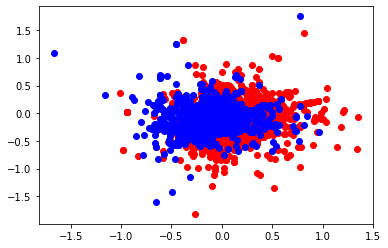

In [28]:
rca = GRP(n_components=3, random_state=5)
x_rca = rca.fit_transform(data_features_scaled)

cls_0 = []
cls_1 = []

for i in range(len(data_label)):
    if(data_label[i] == 0):
        cls_0.append(x_rca[i, :])
    elif(data_label[i] == 1):
        cls_1.append(x_rca[i, :])
plt.plot(np.asarray(cls_0)[:,0], np.asarray(cls_0)[:,1], 'ro')
plt.plot(np.asarray(cls_1)[:,0], np.asarray(cls_1)[:,1], 'bo')

plt.show()

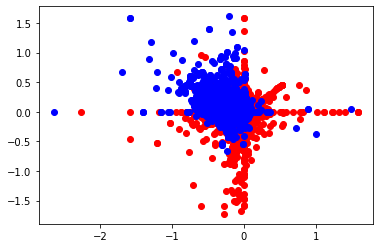

In [30]:
rca = SRP(n_components=3, random_state=3)
x_rca = rca.fit_transform(data_features_scaled)

cls_0 = []
cls_1 = []

for i in range(len(data_label)):
    if(data_label[i] == 0):
        cls_0.append(x_rca[i, :])
    elif(data_label[i] == 1):
        cls_1.append(x_rca[i, :])
plt.plot(np.asarray(cls_0)[:,0], np.asarray(cls_0)[:,1], 'ro')
plt.plot(np.asarray(cls_1)[:,0], np.asarray(cls_1)[:,1], 'bo')

plt.show()

In [31]:
from sklearn import feature_selection
func_chi2 = feature_selection.chi2
func_classif = feature_selection.f_classif
func_mut_reg = feature_selection.mutual_info_regression

In [32]:
def dr_sp(f, p=20):
    sp = SP(percentile=p, score_func=f)
    x_transformed = sp.fit_transform(data_features_scaled, data_label)
    return sp.scores_

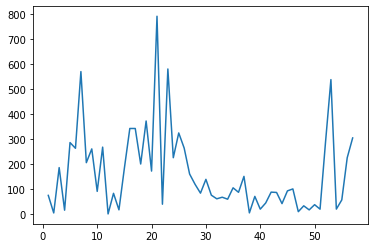

In [33]:
scores_sp_classif = dr_sp(f=func_classif, p=20)
plt.figure()
plt.plot(range(1, 58), scores_sp_classif)
plt.show()

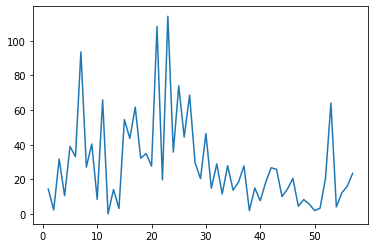

In [34]:
scores_sp_chi2 = dr_sp(f=func_chi2, p=20)
plt.figure()
plt.plot(range(1, 58), scores_sp_chi2)
plt.show()

Clustering after dimension reduction

In [35]:
def pca_features(n, data=data_features_scaled):
    pca = PCA(n_components=n, random_state=3)
    x_pca = pca.fit_transform(data)
    
    return x_pca

In [36]:
def ica_features(n, data=data_features_scaled):
    ica = ICA(n_components=n, random_state=3)
    x_ica = ica.fit_transform(data)
    
    return x_ica

In [66]:
def rca_features(n=2, r=3, data=data_features_scaled):
    rca = GRP(n_components=n, random_state=r)
    x_rca = rca.fit_transform(data)
    
    return x_rca

In [38]:
def sp_features(f=func_classif, p=50, data=data_features_scaled, label=data_label):
    sp = SP(percentile=p, score_func=f)
    x_transformed = sp.fit_transform(data, label)
    return x_transformed

In [39]:
def k_means_dim_red(trans_features, n=2, ini='k-means++', n_ini=10, it=300, t=1e-4, pre='auto', x=True, job=None, algo="auto"):
    
    kmeans = KMeans(n_clusters = n, init = ini, n_init = n_ini, max_iter = it, tol = t, precompute_distances = pre,
                    copy_x = x, n_jobs = job, algorithm = algo, random_state = 5)
    kmeans = kmeans.fit_predict(trans_features)
    
    sli_score = silhouette_score(trans_features, kmeans)
    homo_score = homogeneity_score(data_label, kmeans)
    adj_score = adjusted_rand_score(data_label, kmeans)
    
    r = np.zeros((1,3))
    r[0,0] = sli_score
    r[0,1] = homo_score
    r[0,2] = adj_score
    return r

In [40]:
pca_km_size = [2,5,7,9,10,15,20,30,35,40,50,55]
l_pca_km = len(pca_km_size)
pca_km_scores = np.zeros((3,l_pca_km))
for i in range(l_pca_km):
    pca_km_scores[:,i] = k_means_dim_red(pca_features(pca_km_size[i]), n=3)

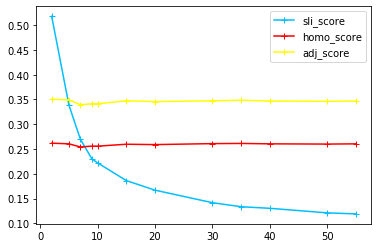

In [41]:
plot_graphs(pca_km_size, pca_km_scores, ["sli_score", "homo_score", "adj_score"])

In [42]:
ica_km_size = [2,5,7,9,10,15,20,30,35,40,50,55]
l_ica_km = len(ica_km_size)
ica_km_scores = np.zeros((3,l_ica_km))
for i in range(l_ica_km):
    ica_km_scores[:,i] = k_means_dim_red(ica_features(ica_km_size[i]), n=3)

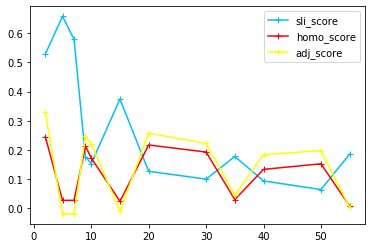

In [43]:
plot_graphs(ica_km_size, ica_km_scores, ["sli_score", "homo_score", "adj_score"])

In [44]:
rca_km_size = [2,5,7,9,10,15,20,30,35,40,50,55]
l_rca_km = len(rca_km_size)
rca_km_scores = np.zeros((3,l_rca_km))
for i in range(l_rca_km):
    rca_km_scores[:,i] = k_means_dim_red(rca_features(rca_km_size[i]), n=3)

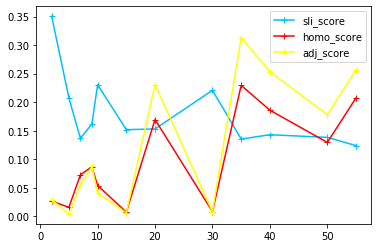

In [45]:
plot_graphs(rca_km_size, rca_km_scores, ["sli_score", "homo_score", "adj_score"])

In [46]:
sp_km_size = [10,20,30,40,50,60,70,80,90,100]
l_sp_km = len(sp_km_size)
sp_km_scores = np.zeros((3,l_sp_km))
for i in range(l_sp_km):
    sp_km_scores[:,i] = k_means_dim_red(sp_features(p=sp_km_size[i]), n=3)

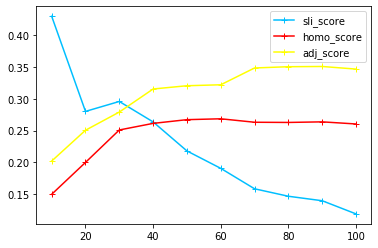

In [47]:
plot_graphs(sp_km_size, sp_km_scores, ["sli_score", "homo_score", "adj_score"])

In [48]:
def em_dim_red(x, n=2, cov='full', t=0.001, reg=1e-06, it=100, init='kmeans', w=None, means=None, 
               pre=None, warm=False):
    
    em = GaussianMixture(n_components=n, covariance_type=cov, tol=t, reg_covar=reg, max_iter=it,
                        init_params=init, weights_init=w, means_init=means, precisions_init=pre,
                        random_state=5, warm_start=warm)
    
    em_predict = em.fit_predict(x)
    
    sli_score = silhouette_score(x, em_predict)
    homo_score = homogeneity_score(data_label, em_predict)
    adj_score = adjusted_rand_score(data_label, em_predict)
    
    r = np.zeros((1,3))
    r[0,0] = sli_score
    r[0,1] = homo_score
    r[0,2] = adj_score
    return r

In [49]:
pca_em_size = [2,5,7,9,10,15,20,30,35,40,50,55]
l_pca_em = len(pca_em_size)
pca_em_scores = np.zeros((3,l_pca_em))
for i in range(l_pca_em):
    pca_em_scores[:,i] = em_dim_red(pca_features(pca_em_size[i]))

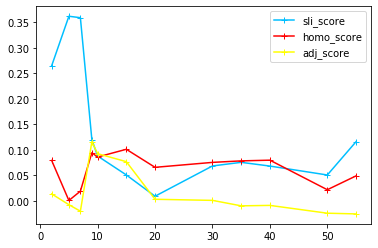

In [50]:
plot_graphs(pca_em_size, pca_em_scores, ["sli_score", "homo_score", "adj_score"])

In [51]:
ica_em_size = [2,5,7,9,10,15,20,30,35,40,50,55]
l_ica_em = len(ica_em_size)
ica_em_scores = np.zeros((3,l_ica_em))
for i in range(l_ica_em):
    ica_em_scores[:,i] = em_dim_red(ica_features(ica_em_size[i]))

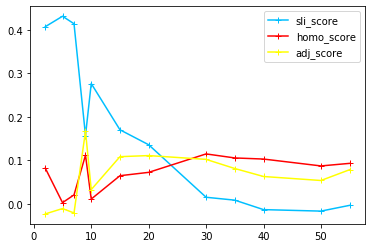

In [52]:
plot_graphs(ica_em_size, ica_em_scores, ["sli_score", "homo_score", "adj_score"])

In [53]:
rca_em_size = [2,5,7,9,10,15,20,30,35,40,50,55]
l_rca_em = len(rca_em_size)
rca_em_scores = np.zeros((3,l_rca_em))
for i in range(l_rca_em):
    rca_em_scores[:,i] = em_dim_red(rca_features(rca_em_size[i]))

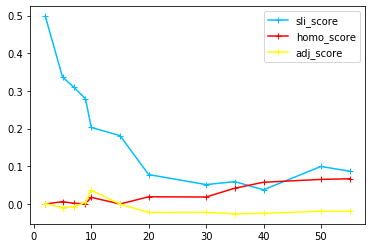

In [54]:
plot_graphs(rca_em_size, rca_em_scores, ["sli_score", "homo_score", "adj_score"])

In [55]:
sp_em_size = [10,20,30,40,50,60,70,80,90,100]
l_sp_em = len(sp_em_size)
sp_em_scores = np.zeros((3,l_sp_em))
for i in range(l_sp_em):
    sp_em_scores[:,i] = em_dim_red(sp_features(p=sp_em_size[i]))

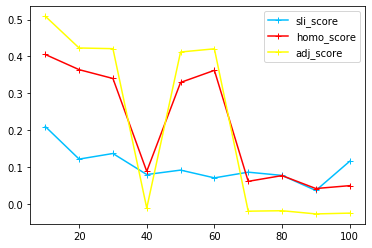

In [56]:
plot_graphs(sp_em_size, sp_em_scores, ["sli_score", "homo_score", "adj_score"])

Neural Network

In [57]:
def nn_mlp(x_train_red, x_test_red, hls=2, lr=0.001):
    
    mlp = MLPClassifier(hidden_layer_sizes=(hls,), solver='adam', activation='logistic', max_iter=1000,
                        learning_rate_init=lr, random_state=99)
    mlp.fit(x_train_red, y_train)
    
    score = np.zeros((1,2))
    y_train_pred = mlp.predict(x_train_red)
    y_test_pred = mlp.predict(x_test_red)
    y_train_accuracy = accuracy_score(y_train_pred, y_train)
    y_test_accuracy = accuracy_score(y_test_pred, y_test)
    score[0,0] = y_train_accuracy
    score[0,1] = y_test_accuracy
    print(score)
    
    return score

In [78]:
pca_n_list = [1,2,3,5,7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57]
l_pca=len(pca_n_list)
scores_pca_n = np.zeros((2, l_pca))
for i in range(l_pca):
    scores_pca_n[:,i] = nn_mlp(pca_features(n=pca_n_list[i], data=x_train), pca_features(n=pca_n_list[i], data=x_test))

[[0.59918478 0.6330076 ]]
[[0.80298913 0.77198697]]
[[0.80054348 0.77633008]]
[[0.83641304 0.73941368]]
[[0.82853261 0.73724213]]
[[0.85896739 0.78718784]]
[[0.87771739 0.79587405]]
[[0.87527174 0.79044517]]
[[0.87581522 0.80238871]]
[[0.88695652 0.7980456 ]]
[[0.88804348 0.79695983]]
[[0.88505435 0.79913138]]
[[0.88695652 0.79044517]]
[[0.89021739 0.79478827]]
[[0.89538043 0.7937025 ]]
[[0.8951087 0.7980456]]
[[0.9048913  0.76221498]]
[[0.90543478 0.76330076]]
[[0.90815217 0.77415852]]
[[0.90543478 0.76438654]]
[[0.91195652 0.76764387]]
[[0.90815217 0.77090119]]
[[0.91603261 0.76438654]]
[[0.91277174 0.76112921]]
[[0.91657609 0.752443  ]]


/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[[0.88722826 0.76872964]]
[[0.91820652 0.76655809]]
[[0.91548913 0.75895765]]
[[0.92146739 0.75895765]]
[[0.91875    0.76655809]]
[[0.91929348 0.7567861 ]]
[[0.91983696 0.76330076]]
[[0.91929348 0.76438654]]
[[0.91875    0.76221498]]
[[0.92445652 0.76330076]]
[[0.92201087 0.75895765]]


/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[[0.92092391 0.75895765]]
[[0.92228261 0.7567861 ]]
[[0.92527174 0.75895765]]
[[0.92554348 0.76547231]]
[[0.92798913 0.76438654]]
[[0.92853261 0.76330076]]
[[0.92934783 0.76221498]]
[[0.92798913 0.76004343]]
[[0.92961957 0.75787188]]
[[0.9326087  0.75135722]]
[[0.93016304 0.75135722]]
[[0.93206522 0.752443  ]]
[[0.93016304 0.752443  ]]
[[0.93206522 0.75027144]]
[[0.9326087  0.75027144]]
[[0.59918478 0.6330076 ]]
[[0.92961957 0.75787188]]


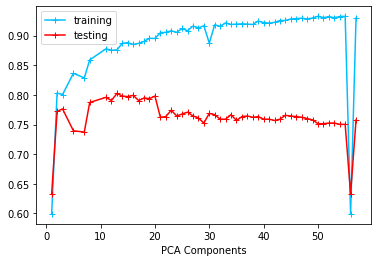

In [79]:
plot_graphs(pca_n_list, scores_pca_n[0:2,:], ["training","testing"],param_name='PCA Components')

In [80]:
ica_n_list = [1,2,3,5,7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57] 
l_ica=len(ica_n_list)
scores_ica_n = np.zeros((2, l_ica))
for i in range(l_ica):
    scores_ica_n[:,i] = nn_mlp(ica_features(n=ica_n_list[i], data=x_train), ica_features(n=ica_n_list[i], data=x_test))

[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]


/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[0.87146739 0.45928339]]
[[0.59918478 0.6330076 ]]
[[0.88478261 0.6970684 ]]
[[0.88967391 0.42345277]]


/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[0.88423913 0.46688382]]
[[0.59918478 0.6330076 ]]


/home/sophie/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[0.89755435 0.49619978]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.90434783 0.62432139]]
[[0.59918478 0.6330076 ]]
[[0.90434783 0.39847991]]
[[0.90597826 0.40390879]]
[[0.91331522 0.51031488]]
[[0.9111413  0.55808903]]
[[0.91168478 0.42345277]]
[[0.59918478 0.6330076 ]]
[[0.90842391 0.50814332]]
[[0.91059783 0.48859935]]
[[0.91413043 0.52985885]]
[[0.91440217 0.39847991]]
[[0.91521739 0.55374593]]
[[0.91277174 0.47339848]]
[[0.91820652 0.55808903]]
[[0.91847826 0.54180239]]
[[0.91929348 0.63952226]]
[[0.91929348 0.57980456]]
[[0.92228261 0.60152009]]
[[0.92228261 0.45602606]]
[[0.59918478 0.6330076 ]]
[[0.92173913 0.47339848]]
[[0.92228261 0.62106406]]
[[0.92282609 0.52008686]]
[[0.59918478 0.6330076 ]]
[[0.92771739 0.57980456]]
[[0.92771739 0.49945711]]
[[0.92934783 0.61889251]]
[[0.92690217 0.52551574]]
[[0.59918478 0.6330076 ]]
[[0.92771739 0.53637351]]
[[0.59918478 0.6330076 ]]
[[0.9263587  0.54180239]]


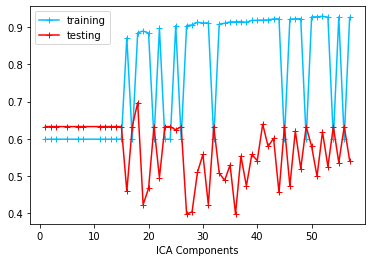

In [81]:
plot_graphs(ica_n_list, scores_ica_n, ["training","testing"], param_name='ICA Components')

In [84]:
scores_rca_n = np.zeros((2, 20))
for i in range(20):
    scores_rca_n[:,i] = nn_mlp(rca_features(n=15, data=x_train, r=i), rca_features(n=15, data=x_test, r=i))

[[0.85       0.83170467]]
[[0.82173913 0.80347448]]
[[0.81847826 0.79153094]]
[[0.84728261 0.83279045]]
[[0.82527174 0.82301846]]
[[0.81983696 0.81976113]]
[[0.81576087 0.80890337]]
[[0.81875    0.80781759]]
[[0.81793478 0.80347448]]
[[0.81331522 0.79478827]]
[[0.81413043 0.7795874 ]]
[[0.84076087 0.81433225]]
[[0.85815217 0.84147666]]
[[0.86603261 0.86536374]]
[[0.80516304 0.79478827]]
[[0.78125    0.76547231]]
[[0.84130435 0.82844734]]
[[0.85923913 0.85124864]]
[[0.79130435 0.80021716]]
[[0.76413043 0.74484256]]


ValueError: x and y must have same first dimension, but have shapes (13,) and (20,)

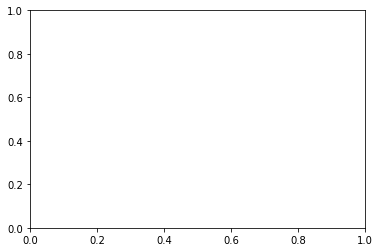

In [85]:
plot_graphs(rca_n_list, scores_rca_n, ["training","testing"], param_name='RP')

In [64]:
sp_per_list = [10,20,30,40,50,60,70,80,90,100] 
l_sp=len(sp_per_list)
scores_sp_per = np.zeros((2, l_sp))
for i in range(l_sp):
    scores_sp_per[:,i] = nn_mlp(sp_features(p=sp_per_list[i], data=x_train, label=y_train), 
                                sp_features(p=sp_per_list[i], data=x_test, label=y_test))

[[0.84184783 0.8534202 ]]
[[0.88206522 0.86862106]]
[[0.89673913 0.85667752]]
[[0.91222826 0.76547231]]
[[0.91684783 0.79913138]]
[[0.92146739 0.89359392]]
[[0.92038043 0.76981542]]
[[0.92608696 0.79153094]]
[[0.93016304 0.82627579]]
[[0.92744565 0.90988056]]


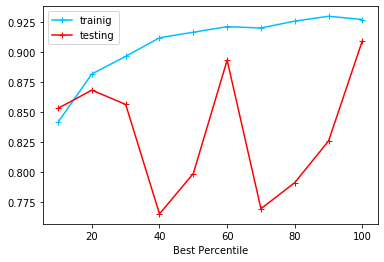

In [65]:
plot_graphs(sp_per_list, scores_sp_per[0:2,:], ["trainig", "testing"], param_name='Best Percentile')

Neural Network : Clustering as dimensionality reduction

In [67]:
def k_means_dim_red_label(trans_features, n=2, ini='k-means++', n_ini=10, it=300, t=1e-4, pre='auto', x=True, job=None, algo="auto"):
    
    kmeans = KMeans(n_clusters = n, init = ini, n_init = n_ini, max_iter = it, tol = t, precompute_distances = pre,
                    copy_x = x, n_jobs = job, algorithm = algo, random_state = 5)
    kmeans = kmeans.fit_predict(trans_features)
    
    return kmeans.reshape(-1,1)

In [73]:
def em_dim_red_label(x, n=2, cov='full', t=0.001, reg=1e-06, it=100, init='kmeans', w=None, means=None, 
               pre=None, warm=False):
    
    em = GaussianMixture(n_components=n, covariance_type=cov, tol=t, reg_covar=reg, max_iter=it,
                        init_params=init, weights_init=w, means_init=means, precisions_init=pre,
                        random_state=5, warm_start=warm)
    
    em_predict = em.fit_predict(x)
    
    return em_predict.reshape(-1,1)

In [69]:
def nn_mlp_cluster(x_train_red, x_test_red, y_train_clu, y_test_clu, hls=2, lr=0.001):
    
    mlp = MLPClassifier(hidden_layer_sizes=(hls,), solver='adam', activation='logistic', max_iter=1000,
                        learning_rate_init=lr, random_state=99)
    mlp.fit(x_train_red, y_train_clu)
    
    score = np.zeros((1,2))
    y_train_pred = mlp.predict(x_train_red)
    y_test_pred = mlp.predict(x_test_red)
    y_train_accuracy = accuracy_score(y_train_pred, y_train_clu)
    y_test_accuracy = accuracy_score(y_test_pred, y_test_clu)
    score[0,0] = y_train_accuracy
    score[0,1] = y_test_accuracy
    print(score)
    
    return score

In [74]:
n_cluster_list = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
len_cluster = len(n_cluster_list)
scores_n_clusters = np.zeros((2, len_cluster))
for i in range(len_cluster):
    x_train_cluster = k_means_dim_red_label(x_train, n=n_cluster_list[i])
    x_test_cluster = k_means_dim_red_label(x_test, n=n_cluster_list[i])
    scores_n_clusters[:,i] = nn_mlp_cluster(x_train_cluster, x_test_cluster, y_train, y_test)

[[0.59918478 0.6330076 ]]
[[0.79048913 0.18783931]]
[[0.76331522 0.40173724]]
[[0.79945652 0.60803474]]
[[0.59918478 0.6330076 ]]
[[0.73016304 0.76004343]]
[[0.7701087  0.68512486]]
[[0.71440217 0.61237785]]
[[0.62744565 0.44082519]]
[[0.70570652 0.72095548]]
[[0.67173913 0.46362649]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.69782609 0.63626493]]
[[0.59918478 0.6330076 ]]
[[0.72663043 0.59391965]]
[[0.71983696 0.59500543]]
[[0.69021739 0.47774159]]


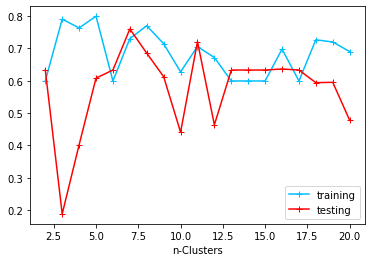

In [75]:
plot_graphs(n_cluster_list, scores_n_clusters[0:2,:], ["training","testing"],param_name='n-Clusters')

In [76]:
em_cluster_list = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
len_em_cluster = len(em_cluster_list)
scores_em_clusters = np.zeros((2, len_em_cluster))
for i in range(len_em_cluster):
    x_train_cluster = em_dim_red_label(x_train, n=em_cluster_list[i])
    x_test_cluster = em_dim_red_label(x_test, n=em_cluster_list[i])
    scores_em_clusters[:,i] = nn_mlp_cluster(x_train_cluster, x_test_cluster, y_train, y_test)

[[0.775      0.56786102]]
[[0.76032609 0.29207383]]
[[0.71494565 0.59609121]]
[[0.82744565 0.58849077]]
[[0.74456522 0.60477742]]
[[0.75217391 0.61237785]]
[[0.57907609 0.76112921]]
[[0.59918478 0.62323561]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.76576087 0.34527687]]
[[0.59429348 0.57437568]]
[[0.7        0.31161781]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.59918478 0.6330076 ]]
[[0.68233696 0.68838219]]
[[0.6875    0.6970684]]


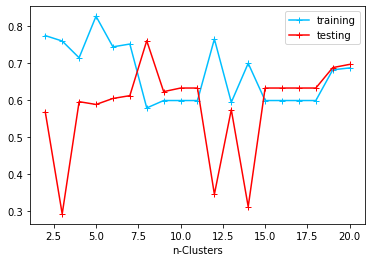

In [77]:
plot_graphs(em_cluster_list, scores_em_clusters[0:2,:], ["training","testing"],param_name='n-Clusters')